Задание 1

Используйте файл с оценками фильмов ml-latest-small/ratings.csv. Посчитайте среднее время жизни пользователей, которые выставили более 100 оценок. Под временем жизни понимается разница между максимальным и минимальным значением столбца timestamp для данного значения userId.

In [3]:
import pandas as pd
import numpy as np
rating_df = pd.read_csv(".\\ml-latest-small\\ratings.csv")
filtered_df = rating_df["userId"].value_counts().reset_index(name='counts')
user_ids = filtered_df.loc[filtered_df["counts"] > 100]["index"].tolist()
res_df = rating_df[rating_df["userId"].isin(user_ids)].groupby("userId")["timestamp"].agg(np.ptp).reset_index(name='lifetime')
print(res_df)

     userId   lifetime
0         4     203560
1         8      85187
2        15  471393496
3        17       8053
4        19       5282
..      ...        ...
253     656       3053
254     659   31609411
255     664   98180439
256     665   54131471
257     671   11283984

[258 rows x 2 columns]


Задание 2
Дана статистика услуг перевозок клиентов компании по типам (см. файл с кодом занятия). Необходимо сформировать две таблицы:
таблицу с тремя типами выручки для каждого client_id без указания адреса клиента
аналогичную таблицу по типам выручки с указанием адреса клиента

In [2]:
rzd = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115],
        'rzd_revenue': [1093, 2810, 10283, 5774, 981]
    }
)
auto = pd.DataFrame(
    {
        'client_id': [113, 114, 115, 116, 117],
        'auto_revenue': [57483, 83, 912, 4834, 98]
    }
)
air = pd.DataFrame(
    {
        'client_id': [115, 116, 117, 118],
        'air_revenue': [81, 4, 13, 173]
    }
)
client_base = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115, 116, 117, 118],
        'address': ['Комсомольская 4', 'Энтузиастов 8а', 'Левобережная 1а', 'Мира 14', 'ЗЖБИиДК 1',
                    'Строителей 18', 'Панфиловская 33', 'Мастеркова 4']
    }
)

res_df = rzd.merge(auto, how='outer', on='client_id')
res_df = res_df.merge(air, how='outer', on='client_id')
print(res_df)
res_df = res_df.merge(client_base, how='outer', on='client_id')
print(res_df)

   client_id  rzd_revenue  auto_revenue  air_revenue
0        111       1093.0           NaN          NaN
1        112       2810.0           NaN          NaN
2        113      10283.0       57483.0          NaN
3        114       5774.0          83.0          NaN
4        115        981.0         912.0         81.0
5        116          NaN        4834.0          4.0
6        117          NaN          98.0         13.0
7        118          NaN           NaN        173.0
   client_id  rzd_revenue  auto_revenue  air_revenue          address
0        111       1093.0           NaN          NaN  Комсомольская 4
1        112       2810.0           NaN          NaN   Энтузиастов 8а
2        113      10283.0       57483.0          NaN  Левобережная 1а
3        114       5774.0          83.0          NaN          Мира 14
4        115        981.0         912.0         81.0        ЗЖБИиДК 1
5        116          NaN        4834.0          4.0    Строителей 18
6        117          NaN        

Задание 3
В задаче сквозной аналитики вам предоставили данные по местоположению пользователей. Т. е. для каждого user_id известна последовательность координат (широта/долгота), когда они требовались приложению для полноценной работы. Как бы вы добавили эти сведения в таблицу визитов и покупок? 

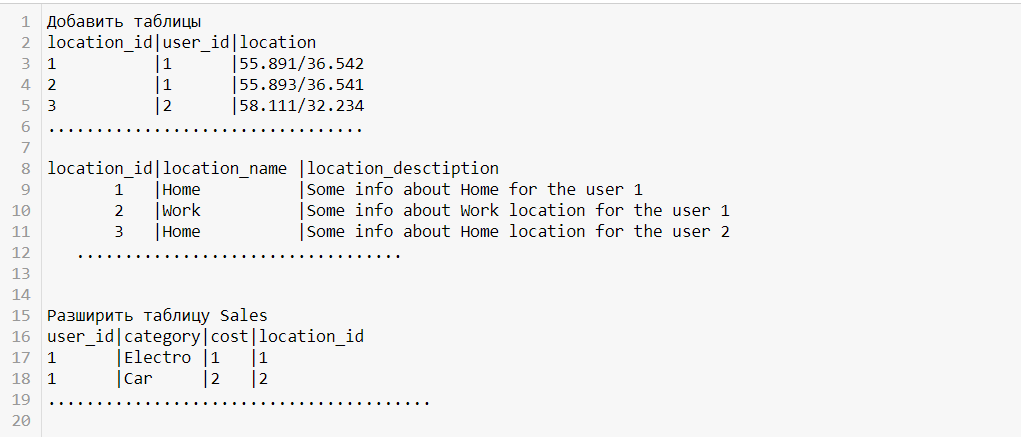

Добавить таблицы 
location_id|user_id|location        
1          |1      |55.891/36.542
2          |1      |55.893/36.541
3          |2      |58.111/32.234
.................................

location_id|location_name |location_desctiption
       1   |Home          |Some info about Home for the user 1
       2   |Work          |Some info about Work location for the user 1
       3   |Home          |Some info about Home location for the user 2
   ..................................


Разширить таблицу Sales
user_id|category|cost|location_id 
1      |Electro |1   |1
1      |Car     |2   |2
........................................
   